In [60]:
import os
import pandas as pd
import numpy as np
import yfinance as yf

## Calculating indicators and downloading data

In [61]:
def download_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

def calculate_technical_indicators(df):
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, min_periods=0, adjust=False).mean()
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12, min_periods=0, adjust=False).mean() - df['Close'].ewm(span=26, min_periods=0, adjust=False).mean()
    df['MACD_Signal'] = df['MACD'].ewm(
        span=9, min_periods=0, adjust=False).mean()
    df['std_20'] = df['Close'].rolling(window=20).std()
    df['Bollinger_Band_Upper'] = df['SMA_20'] + (df['std_20'] * 2)
    df['Bollinger_Band_Lower'] = df['SMA_20'] - (df['std_20'] * 2)
    high14 = df['High'].rolling(window=14).max()
    low14 = df['Low'].rolling(window=14).min()
    df['%K'] = 100 * ((df['Close'] - low14) / (high14 - low14))
    df['%D'] = df['%K'].rolling(window=3).mean()
    df['TR'] = np.maximum.reduce([df['High'] - df['Low'], abs(
        df['High'] - df['Close'].shift()), abs(df['Low'] - df['Close'].shift())])
    df['ATR'] = df['TR'].rolling(window=14).mean()
    df['Daily returns']= df['Close'].pct_change()
    df['Weekly returns'] = df['Close'].pct_change(periods = 5)  
    df['Next Week Close'] = df['Close'].shift(-5)
    df['Label'] = np.where(df['Next Week Close'] > df['Close'], 1, 0)
    df = df.drop(['Next Week Close'],axis= 1)
    return df


tickers = pd.read_csv("..\..\ind_nifty50list.csv", index_col=0)

start = '2012-01-01'
end = '2024-03-31'
print("Parsing Started....")
count = 0
for i in tickers.Symbol:
    symbol = i + '.NS'
    stock_data = download_stock_data(symbol, start, end)
    stock_data_with_indicators = calculate_technical_indicators(stock_data)
    stock_data_with_indicators.to_csv("../Dataset_Indicators/" + str(count) + "_" + i + '.csv')
    print("Done ", count, " ", symbol)
    count += 1
    print("PARSED!")


Parsing Started....


[*********************100%%**********************]  1 of 1 completed


Done  0   ADANIENT.NS
PARSED!


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Done  1   ADANIPORTS.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  2   APOLLOHOSP.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  3   ASIANPAINT.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  4   AXISBANK.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  5   BAJAJ-AUTO.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  6   BAJFINANCE.NS
PARSED!


Done  7   BAJAJFINSV.NS
PARSED!


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Done  8   BPCL.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  9   BHARTIARTL.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  10   BRITANNIA.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  11   CIPLA.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  12   COALINDIA.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  13   DIVISLAB.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  14   DRREDDY.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  15   EICHERMOT.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  16   GRASIM.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  17   HCLTECH.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  18   HDFCBANK.NS
PARSED!
Done  19   HDFCLIFE.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Done  20   HEROMOTOCO.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  21   HINDALCO.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  22   HINDUNILVR.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  23   ICICIBANK.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  24   ITC.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  25   INDUSINDBK.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  26   INFY.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  27   JSWSTEEL.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  28   KOTAKBANK.NS
PARSED!
Done  29   LTIM.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Done  30   LT.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  31   M&M.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  32   MARUTI.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  33   NTPC.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  34   NESTLEIND.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  35   ONGC.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  36   POWERGRID.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  37   RELIANCE.NS
PARSED!
Done  38   SBILIFE.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Done  39   SBIN.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  40   SUNPHARMA.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  41   TCS.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  42   TATACONSUM.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  43   TATAMOTORS.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  44   TATASTEEL.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  45   TECHM.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  46   TITAN.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  47   UPL.NS
PARSED!



[*********************100%%**********************]  1 of 1 completed

Done  48   ULTRACEMCO.NS
PARSED!


Done  49   WIPRO.NS
PARSED!


### GET Nifty 50 index

In [62]:
nifty_50_ticker = '^NSEI'
stock_data = download_stock_data(nifty_50_ticker, start, end)
stock_data_with_indicators = calculate_technical_indicators(stock_data)
stock_data_with_indicators.to_csv("../Dataset_Indicators/nifty50Index.csv")

[*********************100%%**********************]  1 of 1 completed


In [63]:
nifty50index = pd.read_csv("../Dataset_Indicators/nifty50Index.csv")
nifty50index.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,...,std_20,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label
0,2012-01-03,4675.799805,4773.100098,4675.799805,4765.299805,4765.299805,0,NaN,4765.299805,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2012-01-04,4774.950195,4782.850098,4728.850098,4749.649902,4749.649902,0,NaN,4763.809338,NaN,...,NaN,NaN,NaN,NaN,NaN,54.000000,NaN,-0.003284,NaN,1
2,2012-01-05,4749.000000,4779.799805,4730.149902,4749.950195,4749.950195,0,NaN,4762.489419,NaN,...,NaN,NaN,NaN,NaN,NaN,49.649902,NaN,0.000063,NaN,1
3,2012-01-06,4724.149902,4794.899902,4686.850098,4754.100098,4754.100098,0,NaN,4761.690436,NaN,...,NaN,NaN,NaN,NaN,NaN,108.049805,NaN,0.000874,NaN,1
4,2012-01-09,4747.549805,4758.700195,4695.450195,4742.799805,4742.799805,0,NaN,4759.891329,NaN,...,NaN,NaN,NaN,NaN,NaN,63.250000,NaN,-0.002377,NaN,1
5,2012-01-10,4771.850098,4855.899902,4768.250000,4849.549805,4849.549805,0,NaN,4768.430231,NaN,...,NaN,NaN,NaN,NaN,NaN,113.100098,NaN,0.022508,0.017680,1
6,2012-01-11,4863.149902,4877.200195,4841.600098,4860.950195,4860.950195,0,NaN,4777.241656,NaN,...,NaN,NaN,NaN,NaN,NaN,35.600098,NaN,0.002351,0.023433,1
7,2012-01-12,4840.950195,4869.200195,4803.899902,4831.250000,4831.250000,0,NaN,4782.385308,NaN,...,NaN,NaN,NaN,NaN,NaN,65.300293,NaN,-0.006110,0.017116,1
8,2012-01-13,4861.950195,4898.850098,4834.200195,4866.000000,4866.000000,0,NaN,4790.348612,NaN,...,NaN,NaN,NaN,NaN,NaN,67.600098,NaN,0.007193,0.023538,1
9,2012-01-16,4844.000000,4880.799805,4827.049805,4873.899902,4873.899902,0,NaN,4798.305878,NaN,...,NaN,NaN,NaN,NaN,NaN,53.750000,NaN,0.001623,0.027642,1


In [64]:
nifty50index.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,MACD,...,std_20,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label
count,3002.000000,3002.000000,3002.000000,3002.000000,3002.000000,3.002000e+03,2983.000000,3002.000000,2989.000000,3002.000000,...,2983.000000,2983.000000,2983.000000,2989.000000,2987.000000,3001.000000,2988.000000,3001.000000,2997.000000,3002.000000
mean,11090.620306,11143.194787,11019.897990,11083.259698,11083.259698,2.707792e+05,11067.976418,11028.406834,55.538807,40.305556,...,181.737703,11431.451825,10704.501011,60.337370,60.323204,137.654495,137.541760,0.000569,0.002841,0.579614
std,4543.158564,4558.936726,4520.158618,4541.173113,4541.173113,2.021119e+05,4493.863489,4504.217727,17.448242,136.251532,...,128.644060,4615.819880,4383.630835,31.333799,29.264597,102.222481,76.228761,0.010399,0.023227,0.493703
min,4675.799805,4758.700195,4675.799805,4742.799805,4742.799805,0.000000e+00,4913.937476,4759.891329,6.679764,-1005.837460,...,24.983841,5020.090976,4623.555032,0.700226,2.055816,21.850098,46.732178,-0.129805,-0.190239,0.000000
25%,7829.024902,7879.962646,7771.662476,7829.475098,7829.475098,1.539000e+05,7833.197473,7819.441973,42.875196,-26.509341,...,101.159898,8059.680109,7574.955532,32.799488,33.674997,74.049805,83.381217,-0.004498,-0.009938,0.000000
50%,10209.475098,10253.599609,10133.575195,10196.775391,10196.775391,2.201000e+05,10251.677441,10238.303166,55.205321,46.171310,...,143.948832,10517.859166,9916.066836,66.456398,66.617139,109.799805,115.803554,0.000791,0.004073,1.000000
75%,14755.912598,14867.399658,14630.687256,14733.500244,14733.500244,3.324250e+05,14699.033716,14705.019942,68.498901,107.326754,...,228.268118,15201.772958,14238.910707,89.600153,87.720878,169.050781,169.224801,0.006164,0.016815,1.000000
max,22517.500000,22526.599609,22430.000000,22493.550781,22493.550781,1.811000e+06,22200.937500,22176.403808,99.582373,451.083428,...,1393.921659,22611.577748,21869.518827,99.303086,98.870819,1604.250000,729.792899,0.087632,0.107031,1.000000


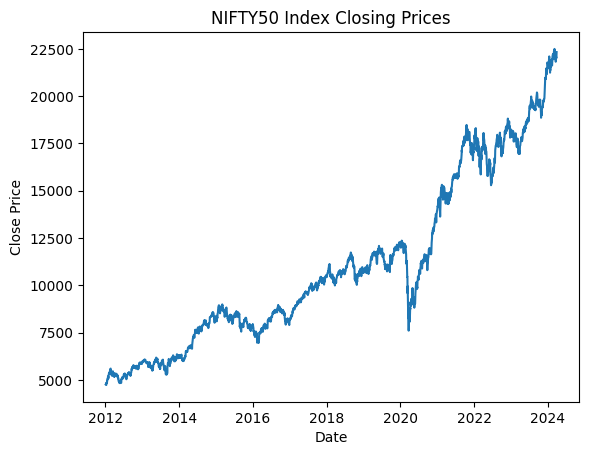

In [65]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(nifty50index['Date']), nifty50index['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('NIFTY50 Index Closing Prices')
plt.show()

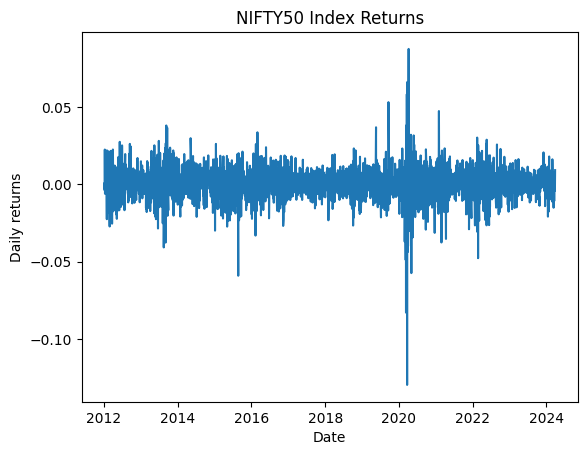

In [66]:
plt.plot(pd.to_datetime(nifty50index['Date']), nifty50index['Daily returns'])
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.title('NIFTY50 Index Returns')
plt.show()

## Hidden markov model to predict regime of the market

In [67]:
nifty50index = pd.read_csv("../Dataset_Indicators/nifty50Index.csv")
nifty50index = nifty50index.dropna()
X = nifty50index['Weekly returns']
X.head()

19    0.030320
20    0.021132
21    0.021635
22    0.023277
23    0.053928
Name: Weekly returns, dtype: float64

In [68]:
from hmmlearn.hmm import GaussianHMM
X = X.values.reshape(-1,1)
model = GaussianHMM(n_components=2, n_iter=1000)
model.fit(X)

GaussianHMM(n_components=2, n_iter=1000)

In [69]:
means = model.means_
covariances = model.covars_
transition_matrix = model.transmat_

print("Estimated Means for Each Regime:")
print(means)
print("Estimated Covariance Matrices for Each Regime:")
print(covariances)
print("Estimated Transition Probabilities:")
print(transition_matrix)

Estimated Means for Each Regime:
[[ 0.00948551]
 [-0.01001209]]
Estimated Covariance Matrices for Each Regime:
[[[0.00018451]]

 [[0.00097688]]]
Estimated Transition Probabilities:
[[0.94032584 0.05967416]
 [0.11233926 0.88766074]]


In [70]:
regimes= model.predict(X)
nifty50index['Regime'] = regimes
nifty50index.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,...,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label,Regime
2997,2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200,22165.649902,22074.356531,50.788372,...,22571.668761,21759.631044,36.961031,18.689849,241.849609,241.446429,0.007915,-0.006082,0,0
2998,2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700,22159.614941,22076.489243,42.329635,...,22565.979919,21753.249964,47.348187,33.366029,297.398438,236.224888,0.003852,0.003333,0,0
2999,2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400,22149.214941,22069.652097,37.492978,...,22560.476695,21737.953188,36.072986,40.127401,149.199219,239.585519,-0.004166,-0.002312,0,0
3000,2024-03-27,22053.949219,22193.599609,22052.849609,22123.650391,22123.650391,409100,22149.294922,22074.794792,43.044222,...,22560.535053,21738.054790,50.643186,44.688120,188.900391,242.524833,0.005406,0.014035,0,0
3001,2024-03-28,22163.599609,22516.000000,22163.599609,22326.900391,22326.900391,410500,22155.722461,22098.804849,45.814487,...,22574.146495,21737.298427,75.539059,54.085077,392.349609,251.060547,0.009187,0.022336,0,0


C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\785255244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


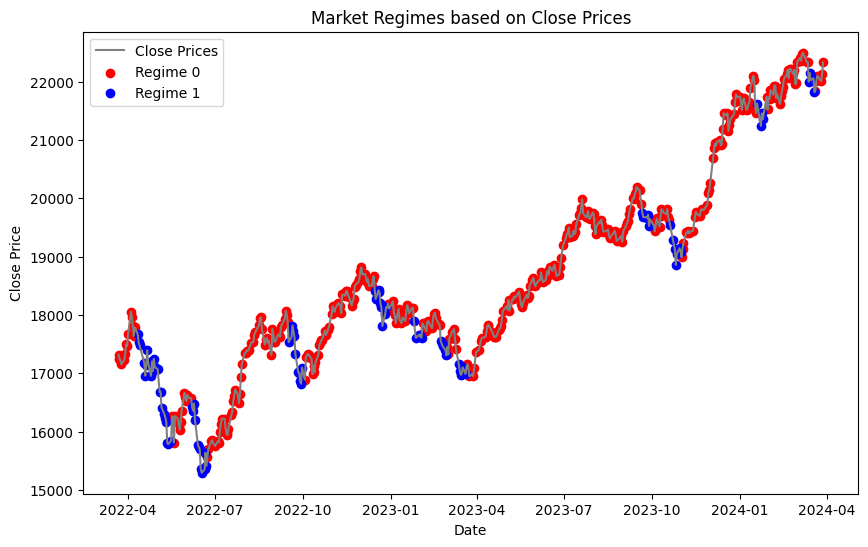

In [71]:
import matplotlib.pyplot as plt

data = nifty50index.tail(500)
data['Date'] = pd.to_datetime(data['Date'])
regime_0 = data[data['Regime'] == 0]
regime_1 = data[data['Regime'] == 1]

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], color='gray', label='Close Prices')
plt.scatter(regime_0['Date'], regime_0['Close'], color='red', label='Regime 0')
plt.scatter(regime_1['Date'], regime_1['Close'],
            color='blue', label='Regime 1')
plt.title('Market Regimes based on Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Clustering datapoints based on regimes

In [72]:
path = "../Dataset_Indicators/"

import os
import pandas as pd

def merge_data(path, nifty50index):
    csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
    dfs = []
    for file in csv_files:
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path)
        
        df = pd.merge(df, nifty50index[['Date', 'Regime']], on='Date', how='left')
        df.dropna(subset=['Regime'], inplace=True)
        
        sym = file.split('.')[0]
        sym = sym.split('_')
        symbol = sym[-1]
        df['symbol'] = symbol
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

df = merge_data(path, nifty50index)
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,...,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label,Regime,symbol
0,2012-01-31,60.451683,64.528801,60.083824,63.747097,53.831100,18940243,53.811424,56.219320,73.152848,...,35.126048,76.759738,75.481661,4.444977,5.514071,0.057328,0.041182,0,0.0,ADANIENT
1,2012-02-01,63.609150,67.172791,63.609150,66.866241,56.465054,13876484,54.952557,57.233313,72.150760,...,35.993296,86.872049,76.745370,3.563641,5.334520,0.048930,0.075567,0,0.0,ADANIENT
2,2012-02-02,67.885521,67.885521,64.666748,65.915939,55.662575,14709385,56.116681,58.060229,69.800012,...,37.485997,82.543973,82.058587,3.218773,5.309886,-0.014212,0.075394,0,0.0,ADANIENT
3,2012-02-03,65.915939,66.398758,64.383186,65.502098,55.313103,4238047,57.344797,58.768979,68.925545,...,39.715167,79.459461,82.958494,2.015572,5.238175,-0.006278,0.009210,0,0.0,ADANIENT
4,2012-02-06,66.483055,67.441025,65.141899,66.682312,56.309734,16488866,58.620812,59.522630,65.911362,...,42.275454,83.116864,81.706766,2.299126,4.950784,0.018018,0.106012,0,0.0,ADANIENT


In [73]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,MACD,...,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label,Regime
count,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,1.481870e+05,148187.000000,148187.000000,148187.000000,148187.000000,...,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000,148187.000000
mean,1385.186514,1399.944576,1368.920936,1384.151334,1327.856086,6.917392e+06,1376.067340,1376.047552,52.787629,5.971296,...,1450.128917,1302.005763,53.664285,53.669605,32.382858,32.237283,0.000833,0.004133,0.537847,0.314063
std,2129.948098,2145.032193,2111.797293,2128.349750,2111.409906,1.678441e+07,2115.947311,2115.411722,16.871449,42.236609,...,2204.746036,2029.825940,29.290357,27.291906,48.705590,42.185740,0.019502,0.043566,0.498567,0.464143
min,18.816547,19.626373,18.606947,18.888002,14.492751,0.000000e+00,21.306049,21.148149,0.680313,-1005.837460,...,23.109804,17.196570,0.177009,0.353162,0.000000,0.626786,-0.387493,-0.538131,0.000000,0.000000
25%,284.000000,288.250000,279.650238,283.899994,252.207581,7.815240e+05,282.341933,282.457480,40.697671,-3.587237,...,300.373200,262.902584,27.705798,29.064982,6.944565,7.878573,-0.009047,-0.019525,0.000000,0.000000
50%,620.650024,628.500000,612.250000,620.266663,584.925232,2.483110e+06,616.027499,614.962888,53.001280,1.903965,...,651.468302,580.162789,56.014942,56.050221,15.289246,16.162504,0.000385,0.003189,1.000000,0.000000
75%,1595.652710,1615.825012,1574.924988,1595.407532,1504.747070,6.738258e+06,1587.364749,1586.051453,65.138139,11.754392,...,1678.885137,1482.595072,80.358278,78.779138,37.500000,39.128584,0.010252,0.026697,1.000000,1.000000
max,22517.500000,22526.599609,22430.000000,22493.550781,22493.550781,6.428460e+08,22200.937500,22176.403808,100.000000,451.083428,...,22611.577748,21869.518827,100.000000,98.949217,1604.250000,729.792899,0.446731,0.661416,1.000000,1.000000


In [74]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

def cluster_data(data,n_clusters = 10):
    X = data.drop(['Label','Regime','Date','symbol'],axis = 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    data['Cluster'] = labels

    return gmm, data

In [75]:
regime0_data = df[df['Regime']==0]
gmm,regime0_data = cluster_data(regime0_data)

print(gmm.means_)
print(gmm.covariances_)

[[-0.43267679 -0.43428131 -0.43150131 -0.43298822 -0.4290989  -0.18611565
  -0.43060004 -0.43103925 -0.2458189  -0.21104726 -0.18818046 -0.47399681
  -0.43680017 -0.4234885  -0.21950705 -0.22179216 -0.47210504 -0.50454939
  -0.1076565  -0.20990225]
 [ 0.27213358  0.28781387  0.26291464  0.27773809  0.28167907  0.7144485
   0.26698313  0.26729628  0.16345644  0.24963859  0.20920298  0.98147282
   0.30338185  0.22739677  0.02839874  0.05197286  1.79696409  0.93229427
   0.49318214  0.62026659]
 [ 2.05600469  2.06661464  2.04495467  2.05461201  2.03873429 -0.35672374
   2.05954281  2.05840957 -0.08806654  0.72408682  0.72306966  2.61454807
   2.10564778  2.0077534  -0.10894958 -0.11417241  2.6231655   2.87604692
  -0.0209111  -0.06142571]
 [ 0.7922955   0.79490038  0.7893686   0.79150617  0.74599421 -0.36033024
   0.76086031  0.76792042  0.75572277  1.03150694  0.82874707  0.99485066
   0.77926381  0.74024638  0.60229146  0.74912481  0.84570977  1.02054198
  -0.05409921  0.2246326 ]
 [ 0.

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\1100001864.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = labels


In [76]:
len(regime0_data)

101647

# Neural Network to predict the class given time series data

In [77]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Assuming regime0_data is a DataFrame containing the required columns

# Extract features (X) and labels (y)
X = regime0_data.drop(columns=['Label', 'Date', 'symbol', 'Cluster','Regime'], axis=1).values
y = regime0_data['Label'].values
cluster_ids = regime0_data['Cluster'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, cluster_ids_train, cluster_ids_test = \
    train_test_split(X, y, cluster_ids, test_size=0.2, random_state=42)

# Train a random forest classifier for each cluster
rf_classifiers = {}
cnt = 0
unique_clusters = np.unique(cluster_ids_train)
for cluster_id in unique_clusters:
    X_train_cluster = X_train[cluster_ids_train == cluster_id]
    y_train_cluster = y_train[cluster_ids_train == cluster_id]
    
    rf_classifier = RandomForestClassifier(n_estimators=30)
    rf_classifier.fit(X_train_cluster, y_train_cluster)
    
    rf_classifiers[cluster_id] = rf_classifier
    cnt+=1
    print(cnt)

# Predict class probabilities for each data point in the testing set
predicted_class_probabilities = []
for data_point, cluster_id in zip(X_test, cluster_ids_test):
    rf_classifier = rf_classifiers[cluster_id]
    proba = rf_classifier.predict_proba([data_point])[0]
    predicted_class_probabilities.append(proba[1])  # Probability of class 1 (price increment)

# Calculate Mean Squared Error between predicted probabilities and true labels
mse = mean_squared_error(y_test, predicted_class_probabilities)
print("Mean Squared Error:", mse)

print(predicted_class_probabilities)


1
2
3
4
5
6
7
8
9
10
Mean Squared Error: 0.20922036399409738
[0.4666666666666667, 0.6333333333333333, 0.7, 0.5, 0.7666666666666667, 0.6, 0.6, 0.5666666666666667, 0.23333333333333334, 0.5, 0.4666666666666667, 0.5666666666666667, 0.6, 0.8333333333333334, 0.43333333333333335, 0.5, 0.5666666666666667, 0.6333333333333333, 0.36666666666666664, 0.8, 0.6333333333333333, 0.7333333333333333, 0.43333333333333335, 0.3333333333333333, 0.26666666666666666, 0.5333333333333333, 0.5666666666666667, 0.23333333333333334, 0.4666666666666667, 0.7666666666666667, 0.5333333333333333, 0.8, 0.5666666666666667, 0.6333333333333333, 0.8333333333333334, 0.6, 0.5333333333333333, 0.5, 0.4666666666666667, 0.7, 0.5666666666666667, 0.3, 0.6333333333333333, 0.5666666666666667, 0.8666666666666667, 0.5666666666666667, 0.4666666666666667, 0.5, 0.7333333333333333, 0.8666666666666667, 0.3, 0.6333333333333333, 0.4, 0.8, 0.6666666666666666, 0.36666666666666664, 0.6, 0.6, 0.5666666666666667, 0.7666666666666667, 0.86666666666666

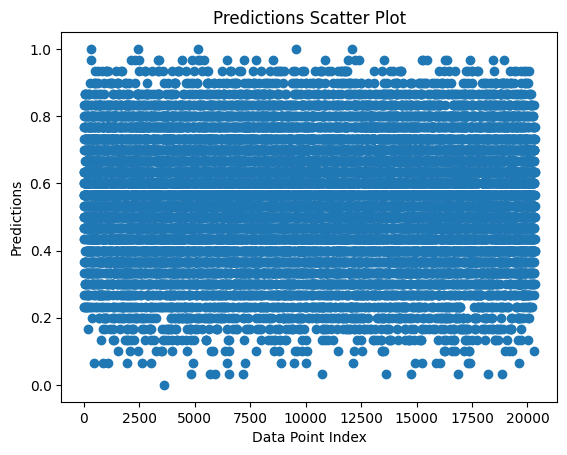

In [78]:
import matplotlib.pyplot as plt

# Generate x-coordinate (indices)
indices = range(len(predicted_class_probabilities))

# Create scatter plot
plt.scatter(indices, predicted_class_probabilities)

# Set plot labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Predictions')
plt.title('Predictions Scatter Plot')

# Show plot
plt.show()


In [79]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# X = regime0_data.drop(columns=['Label', 'Date', 'symbol','Regime']).values  # Features
# y = regime0_data['Label'].values  # Target variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# loss, accuracy = model.evaluate(X_test_scaled, y_test)
# print("Loss:", loss)
# print("Accuracy:", accuracy)




# Implement the algorithm

In [80]:
companies = {}
path = "../Dataset_Indicators/"
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
for file in csv_files:
    file_path = os.path.join(path, file)
    df = pd.read_csv(file_path)
    sym = file.split('.')[0]
    sym = sym.split('_')[-1]
    companies[sym] = df

nifty50index = pd.read_csv("../Dataset_Indicators/nifty50Index.csv")

In [81]:
companies['ADANIENT'].head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,...,std_20,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label
0,2012-01-02,44.909592,44.909592,43.376842,44.242844,37.360775,4426427,NaN,44.242844,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2012-01-03,44.449768,45.062866,43.491798,44.043587,37.192509,7148175,NaN,44.223867,NaN,...,NaN,NaN,NaN,NaN,NaN,1.571068,NaN,-0.004504,NaN,0
2,2012-01-04,44.043587,45.062866,42.334572,42.633457,36.001724,7327278,NaN,44.072399,NaN,...,NaN,NaN,NaN,NaN,NaN,2.728294,NaN,-0.032017,NaN,1
3,2012-01-05,42.319244,42.564484,40.617889,40.939770,34.571503,6668403,NaN,43.774054,NaN,...,NaN,NaN,NaN,NaN,NaN,2.015568,NaN,-0.039727,NaN,1
4,2012-01-06,40.311340,41.920727,40.012455,41.162018,34.759174,7823555,NaN,43.525288,NaN,...,NaN,NaN,NaN,NaN,NaN,1.908272,NaN,0.005429,NaN,1
5,2012-01-09,41.284637,41.844090,40.518261,41.047058,34.662098,7501748,NaN,43.289266,NaN,...,NaN,NaN,NaN,NaN,NaN,1.325829,NaN,-0.002793,-0.072233,1
6,2012-01-10,41.185009,43.760029,41.185009,43.430489,36.674782,14022646,NaN,43.302716,NaN,...,NaN,NaN,NaN,NaN,NaN,2.712971,NaN,0.058066,-0.013920,1
7,2012-01-11,43.522453,49.507843,43.522453,48.128368,40.641895,29144161,NaN,43.762302,NaN,...,NaN,NaN,NaN,NaN,NaN,6.077354,NaN,0.108170,0.128887,1
8,2012-01-12,48.082386,50.550114,46.986469,49.224285,41.567341,16233789,NaN,44.282491,NaN,...,NaN,NaN,NaN,NaN,NaN,3.563644,NaN,0.022771,0.202359,1
9,2012-01-13,48.917732,50.235901,47.216381,49.492516,41.793850,4441048,NaN,44.778684,NaN,...,NaN,NaN,NaN,NaN,NaN,3.019520,NaN,0.005449,0.202383,1


In [82]:
def get_data(company,start_date,end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    filtered_data = company[(pd.to_datetime(company['Date']) >= start_date) & (pd.to_datetime(company['Date']) <= end_date)]

    return filtered_data

get_data(nifty50index,'2023-01-02','2023-01-03')

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,EMA_20,RSI,...,std_20,Bollinger_Band_Upper,Bollinger_Band_Lower,%K,%D,TR,ATR,Daily returns,Weekly returns,Label
2697,2023-01-02,18131.699219,18215.150391,18086.500000,18197.449219,18197.449219,256100,18323.035059,18250.855252,38.534328,...,239.867618,18802.770295,17843.299822,45.907620,42.342409,128.650391,214.778320,0.005090,0.010150,0
2698,2023-01-03,18163.199219,18251.949219,18149.800781,18232.550781,18232.550781,208700,18302.525098,18249.111969,37.938122,...,228.352175,18759.229448,17845.820747,52.159629,44.659610,102.148438,215.781808,0.001929,0.005529,0


In [83]:
from datetime import datetime, timedelta
from hmmlearn.hmm import GaussianHMM

backtest_start = datetime.strptime('2022-07-01', '%Y-%m-%d')
backtest_end = datetime.strptime('2023-01-01', '%Y-%m-%d')

train_start =  datetime.strptime('2013-01-01', '%Y-%m-%d')
train_end = datetime.strptime('2022-06-30', '%Y-%m-%d')

hmm_model = GaussianHMM(n_components=2, n_iter=1000)
X = get_data(nifty50index,train_start,train_end)['Weekly returns'].values.reshape(-1,1)
print(X.shape)
hmm_model.fit(X)


(2330, 1)


GaussianHMM(n_components=2, n_iter=1000)

In [84]:
def get_regimes_and_retrain(hmm_model, data, n_iter=10):

  new_hmm_model = GaussianHMM(n_components=hmm_model.n_components, covariance_type=hmm_model.covariance_type, n_iter = n_iter)
  new_hmm_model.set_params(**hmm_model.get_params())

  X = data['Weekly returns'].values.reshape(-1, 1)
  data['Regime'] = hmm_model.predict(X)
  new_hmm_model.fit(X)

  return data, new_hmm_model


In [85]:
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture

curr_window_start = train_start
curr_window_end = train_end
trading_dates = nifty50index[(pd.to_datetime(nifty50index['Date'])>= backtest_start) & (pd.to_datetime(nifty50index['Date'])<= backtest_end)]['Date'].values

trading_dates = trading_dates[::5]
print(trading_dates)

['2022-07-01' '2022-07-08' '2022-07-15' '2022-07-22' '2022-07-29'
 '2022-08-05' '2022-08-16' '2022-08-23' '2022-08-30' '2022-09-07'
 '2022-09-14' '2022-09-21' '2022-09-28' '2022-10-06' '2022-10-13'
 '2022-10-20' '2022-10-28' '2022-11-04' '2022-11-14' '2022-11-21'
 '2022-11-28' '2022-12-05' '2022-12-12' '2022-12-19' '2022-12-26']


In [86]:
wealth_combined = [1000]
wealth_regime = [1000]
wealth_clustering = [1000]
nifty_wealth = [1000]
for i,trading_day in enumerate(pd.to_datetime(trading_dates)):
    if (i==len(trading_dates)-2):
        break
    
    # nifty_wealth
    rnifty = nifty50index[nifty50index['Date']==trading_dates[i+1]]['Close'].values/nifty50index[nifty50index['Date']==trading_dates[i]]['Close'].values -1
    nifty_wealth.append(nifty_wealth[-1]*(1+rnifty)[0])

    nifty_data = get_data(nifty50index, train_start, trading_day)
    nifty_with_regimes,hmm_model = get_regimes_and_retrain(hmm_model, nifty_data)
    curr_regime = nifty_with_regimes['Regime'].values[-1]
    # print(curr_regime)
    days_curr_regime = nifty_with_regimes[nifty_with_regimes['Regime'] == curr_regime]['Date'].values
    
    cluster_dfs = []
    
    curr_day_dfs = []
    print("OK")
    for sym, data in companies.items():
        stock_data = data[data['Date'].isin(days_curr_regime)].iloc[:-1].copy()  
        curr_day_data = pd.DataFrame(data.iloc[-1].copy()).transpose()
        curr_day_data['Symbol'] = sym
        cluster_dfs.append(stock_data)
        curr_day_dfs.append(curr_day_data)

    stocks_to_cluster = pd.concat(cluster_dfs, ignore_index=True).dropna()
    curr_day_stocks = pd.concat(curr_day_dfs, ignore_index=True).dropna()
    
    if(len(stocks_to_cluster) ==0 or len(curr_day_stocks)==0):
        continue

    print("OK")
    # regime_X = stocks_to_cluster.drop(columns=['Label', 'Date'], axis=1).values 
    # regime_Y = stocks_to_cluster['Label'].values.reshape(-1,1)
    # rf_regime= RandomForestClassifier(n_estimators=30)
    # rf_regime.fit(regime_X, regime_Y)
    # predicted_class_probabilities = []
    # for data_point in curr_day_stocks.drop(['Date','Label','Symbol'],axis = 1).values:
    #     rf_classifier = rf_regime
    #     proba = rf_classifier.predict_proba([data_point])[0]  
    #     predicted_class_probabilities.append(proba[1]) 

    # print(predicted_class_probabilities)
    
    # prob = []
    # cnt = 0
    # for sym, data in companies.items():
    #     next_week_return  = data[data['Date']==trading_dates[i+1]]['Close'].values/data[data['Date']==trading_dates[i]]['Close'].values -1
    #     if next_week_return is None:
    #         continue
    #     prob.append([next_week_return, predicted_class_probabilities[cnt]])
    #     cnt+=1
    
    # print(prob)
    # prob_sorted = sorted(prob, key=lambda x: x[1], reverse=True)
    # r = 0
    # for i in range(5):
    #     r+= (1/5)*prob_sorted[i][0]
    # wealth_regime.append(wealth_regime[-1]*(1+r)[0])

    X = stocks_to_cluster[['Weekly returns']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print("OK")
    n_clusters = 10
    gmm = GaussianMixture(n_components=n_clusters)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    print("OK")
    clustered_data = pd.DataFrame(stocks_to_cluster, columns=stocks_to_cluster.columns)
    clustered_data['Label'] = stocks_to_cluster['Label'].values
    clustered_data['Date'] = stocks_to_cluster['Date'].values
    clustered_data['Cluster'] = labels
    

    curr_day_scaled = scaler.transform(curr_day_stocks[['Weekly returns']]) 
    curr_day_labels = gmm.predict(curr_day_scaled)  
    curr_day_stocks['Clusters'] = curr_day_labels
    
    print("OK")
    rf_classifiers = {}
    for cluster_id in range(n_clusters):
        X_train_cluster = clustered_data[clustered_data['Cluster'] == cluster_id].drop(columns=['Label', 'Date', 'Cluster'], axis=1).values
        y_train_cluster = clustered_data[clustered_data['Cluster'] == cluster_id]['Label'].values

        if(X_train_cluster.shape[0]==0):
            continue
        rf_classifier = RandomForestClassifier(n_estimators=30)
        rf_classifier.fit(X_train_cluster, y_train_cluster)
    
        rf_classifiers[cluster_id] = rf_classifier
    
    print("OK")
    predicted_class_probabilities = []
    for data_point, cluster_id in zip(curr_day_stocks.drop(['Clusters','Date','Label','Symbol'],axis = 1).values, curr_day_stocks['Clusters'].values):
        if cluster_id not in rf_classifiers.keys():
            predicted_class_probabilities.append(0)
            continue
        rf_classifier = rf_classifiers[cluster_id]
        proba = rf_classifier.predict_proba([data_point])[0]  
        predicted_class_probabilities.append(proba[1]) 

    print(predicted_class_probabilities)
    
    prob = []
    cnt = 0
    for sym, data in companies.items():
        next_week_return  = data[data['Date']==trading_dates[i+1]]['Close'].values/data[data['Date']==trading_dates[i]]['Close'].values -1
        if next_week_return is None:
            continue
        prob.append([next_week_return, predicted_class_probabilities[cnt]])
        cnt+=1
    
    print(prob)
    prob_sorted = sorted(prob, key=lambda x: x[1], reverse=True)
    r = 0
    for i in range(5):
        r+= (1/5)*prob_sorted[i][0]

    wealth_combined.append(wealth_combined[-1]*(1+r)[0])
    print(wealth_combined)
    # print(wealth_regime)
    print(nifty_wealth)
    


C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
OK
[0.6, 0.7333333333333333, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.5666666666666667, 0.6, 0.8666666666666667, 0.6, 0.6, 0.4, 0.5333333333333333, 0.6, 0.6666666666666666, 0.4, 0.36666666666666664, 0.5, 0.6666666666666666, 0.5, 0.3, 0.43333333333333335, 0.4666666666666667, 0.7, 0.7, 0.4666666666666667, 0.3, 0.5, 0.8333333333333334, 0.4, 0.7333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.7333333333333333, 0.4666666666666667, 0.5, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5666666666666667, 0.43333333333333335, 0.7666666666666667, 0.6333333333333333, 0.36666666666666664, 0.6, 0.26666666666666666, 0.7666666666666667, 0.5666666666666667, 0.6666666666666666, 0.4666666666666667, 0.5666666666666667]
[[array([0.02726015]), 0.6], [array([0.06489317]), 0.7333333333333333], [array([-0.01458967]), 0.5333333333333333], [array([0.03574354]), 0.5333333333333333], [array([0.00927822]), 0.43333333333333335], [array([0.00462854]),

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6, 0.8666666666666667, 0.5333333333333333, 0.5, 0.43333333333333335, 0.7333333333333333, 0.4666666666666667, 0.7, 0.43333333333333335, 0.6333333333333333, 0.7, 0.7, 0.6666666666666666, 0.5333333333333333, 0.4666666666666667, 0.3333333333333333, 0.43333333333333335, 0.6333333333333333, 0.3333333333333333, 0.5666666666666667, 0.6666666666666666, 0.6333333333333333, 0.8, 0.6, 0.5, 0.6666666666666666, 0.5333333333333333, 0.8666666666666667, 0.5666666666666667, 0.6333333333333333, 0.6, 0.5666666666666667, 0.5, 0.5333333333333333, 0.4, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.26666666666666666, 0.43333333333333335, 0.36666666666666664, 0.7, 0.6333333333333333, 0.4, 0.5, 0.6, 0.36666666666666664, 0.43333333333333335, 0.6333333333333333, 0.6, 0.4]
[[array([0.04893044]), 0.6], [array([0.00837054]), 0.8666666666666667], [array([0.0327115]), 0.5333333333333333], [array([0.01896729]), 0.5], [array([0.01537601]), 0.43333333333333335], [array([0.03172797]), 0.7

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5, 0.9, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.7333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6, 0.5, 0.6666666666666666, 0.5666666666666667, 0.6, 0.4666666666666667, 0.4, 0.43333333333333335, 0.8, 0.3333333333333333, 0.5, 0.8333333333333334, 0.5333333333333333, 0.8, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.4, 0.6666666666666666, 0.3333333333333333, 0.4, 0.5, 0.5, 0.6666666666666666, 0.6666666666666666, 0.4666666666666667, 0.6, 0.3, 0.36666666666666664, 0.3333333333333333, 0.5333333333333333, 0.5, 0.6, 0.6333333333333333, 0.6333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.5, 0.5333333333333333, 0.5333333333333333, 0.36666666666666664]
[[array([0.0391435]), 0.5], [array([0.00585883]), 0.9], [array([0.0062626]), 0.4666666666666667], [array([0.0191314]), 0.5333333333333333], [array([0.01850982]), 0.4666666666666667], [array([-0.03794545]), 0.7333333333333333], [array([0.03744235]

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6666666666666666, 0.8333333333333334, 0.6333333333333333, 0.3333333333333333, 0.3, 0.5333333333333333, 0.6666666666666666, 0.5333333333333333, 0.5666666666666667, 0.6666666666666666, 0.4, 0.4, 0.6666666666666666, 0.4666666666666667, 0.43333333333333335, 0.4666666666666667, 0.6333333333333333, 0.7333333333333333, 0.5666666666666667, 0.5666666666666667, 0.6666666666666666, 0.7333333333333333, 0.8333333333333334, 0.7, 0.6666666666666666, 0.4, 0.4666666666666667, 0.8, 0.5666666666666667, 0.7, 0.5666666666666667, 0.7, 0.4666666666666667, 0.5, 0.4666666666666667, 0.6666666666666666, 0.5, 0.6, 0.26666666666666666, 0.6, 0.5333333333333333, 0.6666666666666666, 0.5, 0.4666666666666667, 0.4666666666666667, 0.26666666666666666, 0.7, 0.36666666666666664, 0.5, 0.4, 0.3333333333333333]
[[array([0.02792672]), 0.6666666666666666], [array([0.00747781]), 0.8333333333333334], [array([0.00545216]), 0.6333333333333333], [array([0.07179094]), 0.3333333333333333], [array([0.00919205]), 0.3],

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
OK
[0.5333333333333333, 0.6, 0.5333333333333333, 0.43333333333333335, 0.3333333333333333, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5, 0.7333333333333333, 0.5333333333333333, 0.5333333333333333, 0.5, 0.5666666666666667, 0.5666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.4666666666666667, 0.6, 0.6, 0.6333333333333333, 0.7333333333333333, 0.5666666666666667, 0.4666666666666667, 0.5666666666666667, 0.5666666666666667, 0.8333333333333334, 0.5, 0.5333333333333333, 0.6333333333333333, 0.6666666666666666, 0.6, 0.6333333333333333, 0.6, 0.5333333333333333, 0.6, 0.3, 0.36666666666666664, 0.4666666666666667, 0.5, 0.4, 0.6, 0.7333333333333333, 0.6666666666666666, 0.6333333333333333, 0.4666666666666667, 0.43333333333333335, 0.6666666666666666, 0.4, 0.3333333333333333]
[[array([0.05028801]), 0.5333333333333333], [array([-0.05443027]), 0.6], [array([0.05811329]), 0.5333333333333333], [array([-0.01325445]), 0.43333333333333335], [array([0.02102229]), 

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6, 0.5333333333333333, 0.5, 0.5666666666666667, 0.4666666666666667, 0.36666666666666664, 0.5666666666666667, 0.6666666666666666, 0.43333333333333335, 0.6666666666666666, 0.6, 0.6666666666666666, 0.5, 0.7, 0.5666666666666667, 0.43333333333333335, 0.5666666666666667, 0.7333333333333333, 0.36666666666666664, 0.5333333333333333, 0.5333333333333333, 0.8, 0.5333333333333333, 0.7, 0.4, 0.5333333333333333, 0.6, 0.7, 0.5666666666666667, 0.36666666666666664, 0.5, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.4, 0.4666666666666667, 0.5333333333333333, 0.5, 0.43333333333333335, 0.6666666666666666, 0.4, 0.5333333333333333, 0.3333333333333333, 0.7333333333333333, 0.7666666666666667, 0.4666666666666667, 0.6, 0.5, 0.6, 0.5, 0.16666666666666666]
[[array([0.10282027]), 0.6], [array([0.00063714]), 0.5333333333333333], [array([0.00033852]), 0.5], [array([0.06932117]), 0.5666666666666667], [array([-0.04606103]), 0.4666666666666667], [array([0.03390782]), 0.3666666666666666

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
OK
[0.6666666666666666, 0.3333333333333333, 0.5, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.6666666666666666, 0.8, 0.4, 0.6666666666666666, 0.5333333333333333, 0.7, 0.6, 0.5, 0.5333333333333333, 0.5666666666666667, 0.4, 0.7333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6666666666666666, 0.43333333333333335, 0.8333333333333334, 0.4666666666666667, 0.5333333333333333, 0.5333333333333333, 0.6, 0.5666666666666667, 0.6333333333333333, 0.6333333333333333, 0.5666666666666667, 0.6, 0.5, 0.7, 0.4, 0.5333333333333333, 0.5, 0.36666666666666664, 0.36666666666666664, 0.6, 0.4, 0.5, 0.43333333333333335, 0.43333333333333335, 0.5333333333333333, 0.36666666666666664, 0.5666666666666667, 0.5333333333333333, 0.5, 0.5, 0.5]
[[array([0.01841484]), 0.6666666666666666], [array([-0.00318389]), 0.3333333333333333], [array([0.00589626]), 0.5], [array([-0.00022426]), 0.5333333333333333], [array([-0.05351017]), 0.4666666666666667], [array([-0.01690398]), 0.53333333333

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.8, 0.5666666666666667, 0.5, 0.36666666666666664, 0.4, 0.5666666666666667, 0.6333333333333333, 0.6, 0.4, 0.6333333333333333, 0.5333333333333333, 0.5666666666666667, 0.6, 0.5333333333333333, 0.5, 0.6, 0.5666666666666667, 0.7, 0.8333333333333334, 0.5666666666666667, 0.7666666666666667, 0.7, 0.8333333333333334, 0.5, 0.7666666666666667, 0.36666666666666664, 0.5, 0.7333333333333333, 0.6, 0.7333333333333333, 0.5, 0.7666666666666667, 0.23333333333333334, 0.5, 0.43333333333333335, 0.7, 0.5333333333333333, 0.3333333333333333, 0.23333333333333334, 0.6333333333333333, 0.6, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.5666666666666667, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.6, 0.43333333333333335, 0.5333333333333333]
[[array([0.05401488]), 0.8], [array([0.01877023]), 0.5666666666666667], [array([-0.00211413]), 0.5], [array([0.0536235]), 0.36666666666666664], [array([0.02676728]), 0.4], [array([0.00470987]), 0.5666666666666667], [array([-0.0

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.7666666666666667, 0.7333333333333333, 0.43333333333333335, 0.5333333333333333, 0.36666666666666664, 0.6, 0.4666666666666667, 0.5, 0.5, 0.5, 0.4, 0.6333333333333333, 0.43333333333333335, 0.6666666666666666, 0.5, 0.43333333333333335, 0.3333333333333333, 0.7333333333333333, 0.43333333333333335, 0.6, 0.6333333333333333, 0.6, 0.6666666666666666, 0.6666666666666666, 0.6, 0.3, 0.43333333333333335, 0.6, 0.36666666666666664, 0.6, 0.36666666666666664, 0.5333333333333333, 0.7, 0.6333333333333333, 0.2, 0.5, 0.43333333333333335, 0.4, 0.23333333333333334, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6333333333333333, 0.43333333333333335, 0.6333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.5, 0.5333333333333333, 0.43333333333333335]
[[array([0.0874669]), 0.7666666666666667], [array([-0.02130614]), 0.7333333333333333], [array([0.01256685]), 0.43333333333333335], [array([0.01724874]), 0.5333333333333333], [array([-0.00989844]), 0.36666666666666664], [array([0.00100117

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5333333333333333, 0.7666666666666667, 0.6666666666666666, 0.5666666666666667, 0.43333333333333335, 0.5666666666666667, 0.6, 0.5666666666666667, 0.5333333333333333, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5333333333333333, 0.5666666666666667, 0.4, 0.3333333333333333, 0.43333333333333335, 0.5666666666666667, 0.4, 0.6, 0.5, 0.5, 0.7333333333333333, 0.7333333333333333, 0.5333333333333333, 0.36666666666666664, 0.3333333333333333, 0.7333333333333333, 0.5, 0.4, 0.5666666666666667, 0.4, 0.4666666666666667, 0.6666666666666666, 0.3, 0.7666666666666667, 0.5333333333333333, 0.4666666666666667, 0.26666666666666666, 0.6333333333333333, 0.36666666666666664, 0.5666666666666667, 0.7, 0.5333333333333333, 0.5333333333333333, 0.4, 0.5333333333333333, 0.5666666666666667, 0.6, 0.5666666666666667, 0.3]
[[array([0.02831237]), 0.5333333333333333], [array([0.0215655]), 0.7666666666666667], [array([0.00803609]), 0.6666666666666666], [array([-0.02888846]), 0.5666666666666667], [array([0.0

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6333333333333333, 0.6, 0.43333333333333335, 0.5666666666666667, 0.5, 0.5, 0.6, 0.7, 0.5, 0.6666666666666666, 0.6666666666666666, 0.6333333333333333, 0.5666666666666667, 0.36666666666666664, 0.4, 0.5333333333333333, 0.5333333333333333, 0.7, 0.36666666666666664, 0.7333333333333333, 0.7, 0.5333333333333333, 0.6333333333333333, 0.5, 0.6666666666666666, 0.6, 0.43333333333333335, 0.7666666666666667, 0.4666666666666667, 0.6666666666666666, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.6, 0.26666666666666666, 0.7666666666666667, 0.43333333333333335, 0.43333333333333335, 0.3, 0.5333333333333333, 0.5, 0.5333333333333333, 0.7666666666666667, 0.43333333333333335, 0.5, 0.26666666666666666, 0.5666666666666667, 0.4666666666666667, 0.6, 0.36666666666666664, 0.4]
[[array([0.01903642]), 0.6333333333333333], [array([0.00497729]), 0.6], [array([0.00985903]), 0.43333333333333335], [array([-0.00172448]), 0.5666666666666667], [array([-0.02585493]), 0.5], [array([-0.01456994]

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.26666666666666666, 0.4666666666666667, 0.4666666666666667, 0.23333333333333334, 0.5666666666666667, 0.23333333333333334, 0.23333333333333334, 0.5333333333333333, 0.6, 0.4666666666666667, 0.4666666666666667, 0.5, 0.3, 0.6, 0.4666666666666667, 0.3, 0.5333333333333333, 0.5333333333333333, 0.23333333333333334, 0.36666666666666664, 0.6, 0.7666666666666667, 0.5, 0.3, 0.3333333333333333, 0.13333333333333333, 0.16666666666666666, 0.3, 0.3, 0.5333333333333333, 0.5666666666666667, 0.4, 0.4666666666666667, 0.4, 0.23333333333333334, 0.7, 0.4666666666666667, 0.6333333333333333, 0.5, 0.3, 0.16666666666666666, 0.4, 0.5666666666666667, 0.5666666666666667, 0.26666666666666666, 0.16666666666666666, 0.5666666666666667, 0.4, 0.36666666666666664, 0.36666666666666664, 0.36666666666666664]
[[array([-0.02509549]), 0.26666666666666666], [array([0.02324965]), 0.4666666666666667], [array([0.02499066]), 0.4666666666666667], [array([-0.08961347]), 0.23333333333333334], [array([0.03627897]), 0.566

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.36666666666666664, 0.23333333333333334, 0.6666666666666666, 0.6333333333333333, 0.4666666666666667, 0.36666666666666664, 0.7666666666666667, 0.6333333333333333, 0.4666666666666667, 0.4666666666666667, 0.6333333333333333, 0.7666666666666667, 0.6333333333333333, 0.6666666666666666, 0.5666666666666667, 0.5333333333333333, 0.43333333333333335, 0.7666666666666667, 0.5333333333333333, 0.7666666666666667, 0.8, 0.7333333333333333, 0.6, 0.5, 0.5666666666666667, 0.8333333333333334, 0.6, 0.36666666666666664, 0.5, 0.7333333333333333, 0.4666666666666667, 0.7333333333333333, 0.6666666666666666, 0.6, 0.7, 0.6, 0.6, 0.5333333333333333, 0.43333333333333335, 0.5333333333333333, 0.4, 0.43333333333333335, 0.6333333333333333, 0.23333333333333334, 0.5666666666666667, 0.3333333333333333, 0.4, 0.5, 0.7, 0.4, 0.5333333333333333]
[[array([-0.07432194]), 0.36666666666666664], [array([-0.02222825]), 0.23333333333333334], [array([0.03399711]), 0.6666666666666666], [array([0.10768499]), 0.63333333

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5333333333333333, 0.7333333333333333, 0.5666666666666667, 0.3333333333333333, 0.5333333333333333, 0.5333333333333333, 0.6, 0.6, 0.5333333333333333, 0.5666666666666667, 0.6, 0.8, 0.7, 0.3333333333333333, 0.3333333333333333, 0.36666666666666664, 0.2, 0.7666666666666667, 0.3333333333333333, 0.43333333333333335, 0.5333333333333333, 0.5666666666666667, 0.8666666666666667, 0.5, 0.5333333333333333, 0.5333333333333333, 0.3333333333333333, 0.6333333333333333, 0.4666666666666667, 0.4666666666666667, 0.4, 0.4, 0.6, 0.6333333333333333, 0.4666666666666667, 0.7, 0.5666666666666667, 0.5333333333333333, 0.23333333333333334, 0.43333333333333335, 0.43333333333333335, 0.5, 0.8333333333333334, 0.5, 0.5666666666666667, 0.43333333333333335, 0.6666666666666666, 0.5333333333333333, 0.5, 0.6, 0.6]
[[array([-0.01563169]), 0.5333333333333333], [array([0.0045255]), 0.7333333333333333], [array([-0.02714966]), 0.5666666666666667], [array([0.0044968]), 0.3333333333333333], [array([-0.0560273]), 0.5

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.7, 0.5666666666666667, 0.4, 0.3, 0.5333333333333333, 0.5333333333333333, 0.5, 0.7333333333333333, 0.36666666666666664, 0.6333333333333333, 0.4, 0.5, 0.3, 0.4, 0.4666666666666667, 0.2, 0.4666666666666667, 0.3, 0.4, 0.4, 0.5666666666666667, 0.6, 0.5333333333333333, 0.3, 0.6, 0.1, 0.2, 0.6666666666666666, 0.4666666666666667, 0.36666666666666664, 0.5333333333333333, 0.26666666666666666, 0.3333333333333333, 0.6333333333333333, 0.36666666666666664, 0.7333333333333333, 0.4, 0.3333333333333333, 0.23333333333333334, 0.4, 0.3, 0.4666666666666667, 0.43333333333333335, 0.5, 0.6, 0.06666666666666667, 0.36666666666666664, 0.5333333333333333, 0.36666666666666664, 0.4, 0.3333333333333333]
[[array([0.03817673]), 0.7], [array([0.00146642]), 0.5666666666666667], [array([0.03003672]), 0.4], [array([0.02749945]), 0.3], [array([0.03633804]), 0.5333333333333333], [array([0.02218747]), 0.5333333333333333], [array([0.05184085]), 0.5], [array([0.00547701]), 0.7333333333333333], [array([0.03594

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6666666666666666, 0.5333333333333333, 0.5, 0.5, 0.5, 0.7, 0.5666666666666667, 0.5333333333333333, 0.6, 0.7333333333333333, 0.36666666666666664, 0.4666666666666667, 0.6, 0.5, 0.4, 0.5, 0.6333333333333333, 0.7, 0.5333333333333333, 0.6333333333333333, 0.5333333333333333, 0.6333333333333333, 0.7666666666666667, 0.5666666666666667, 0.5666666666666667, 0.6333333333333333, 0.6666666666666666, 0.6333333333333333, 0.4, 0.4, 0.6333333333333333, 0.5, 0.5666666666666667, 0.8333333333333334, 0.5666666666666667, 0.5666666666666667, 0.6333333333333333, 0.6333333333333333, 0.16666666666666666, 0.6333333333333333, 0.4, 0.6333333333333333, 0.9, 0.4666666666666667, 0.6, 0.5666666666666667, 0.6666666666666666, 0.5333333333333333, 0.5333333333333333, 0.5666666666666667, 0.4]
[[array([-0.01006823]), 0.6666666666666666], [array([-0.00328482]), 0.5333333333333333], [array([0.0161857]), 0.5], [array([0.01410786]), 0.5], [array([-0.02858783]), 0.5], [array([0.02549991]), 0.7], [array([0.025909

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6666666666666666, 0.7666666666666667, 0.4, 0.3, 0.43333333333333335, 0.3333333333333333, 0.5, 0.5, 0.7, 0.5333333333333333, 0.5333333333333333, 0.43333333333333335, 0.6333333333333333, 0.5666666666666667, 0.43333333333333335, 0.23333333333333334, 0.5333333333333333, 0.7666666666666667, 0.4666666666666667, 0.5666666666666667, 0.43333333333333335, 0.5, 0.8, 0.6, 0.5, 0.2, 0.4666666666666667, 0.5666666666666667, 0.6, 0.5333333333333333, 0.5, 0.6333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.4, 0.5, 0.5333333333333333, 0.36666666666666664, 0.43333333333333335, 0.5333333333333333, 0.8333333333333334, 0.5666666666666667, 0.5, 0.6666666666666666, 0.6, 0.4666666666666667, 0.5666666666666667, 0.4666666666666667, 0.7333333333333333, 0.4]
[[array([0.15344686]), 0.6666666666666666], [array([0.00701485]), 0.7666666666666667], [array([-0.0078774]), 0.4], [array([0.00675127]), 0.3], [array([0.05603948]), 0.43333333333333335], [array([0.01460776]), 0.3

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.7, 0.8, 0.4666666666666667, 0.3333333333333333, 0.4, 0.6, 0.5333333333333333, 0.5666666666666667, 0.4666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5, 0.5666666666666667, 0.6333333333333333, 0.4, 0.4, 0.6, 0.6333333333333333, 0.36666666666666664, 0.3, 0.8333333333333334, 0.6, 0.7666666666666667, 0.6666666666666666, 0.4, 0.4, 0.5333333333333333, 0.7, 0.43333333333333335, 0.4666666666666667, 0.4666666666666667, 0.6, 0.6, 0.6666666666666666, 0.5, 0.5, 0.36666666666666664, 0.6, 0.26666666666666666, 0.3, 0.4666666666666667, 0.6333333333333333, 0.7333333333333333, 0.5333333333333333, 0.43333333333333335, 0.3333333333333333, 0.7333333333333333, 0.4666666666666667, 0.4666666666666667, 0.6666666666666666, 0.5]
[[array([0.04938369]), 0.7], [array([0.07879456]), 0.8], [array([-0.01448388]), 0.4666666666666667], [array([0.00467382]), 0.3333333333333333], [array([-0.1256173]), 0.4], [array([-0.03567881]), 0.6], [array([-0.04098825]), 0.5333333333333333], [array([-0.009

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6, 0.8666666666666667, 0.6, 0.5333333333333333, 0.3333333333333333, 0.5, 0.6333333333333333, 0.5666666666666667, 0.5333333333333333, 0.6333333333333333, 0.4666666666666667, 0.5666666666666667, 0.6333333333333333, 0.43333333333333335, 0.26666666666666666, 0.43333333333333335, 0.43333333333333335, 0.6, 0.6, 0.6, 0.6333333333333333, 0.6666666666666666, 0.6666666666666666, 0.6, 0.36666666666666664, 0.5666666666666667, 0.5333333333333333, 0.6666666666666666, 0.5, 0.5666666666666667, 0.8, 0.6666666666666666, 0.5333333333333333, 0.6333333333333333, 0.36666666666666664, 0.43333333333333335, 0.5333333333333333, 0.5333333333333333, 0.3333333333333333, 0.7, 0.6666666666666666, 0.6333333333333333, 0.6333333333333333, 0.5, 0.6, 0.6333333333333333, 0.5666666666666667, 0.4666666666666667, 0.6, 0.43333333333333335, 0.6]
[[array([-0.00514598]), 0.6], [array([0.00392295]), 0.8666666666666667], [array([-0.022178]), 0.6], [array([-0.07180421]), 0.5333333333333333], [array([-0.00297646]),

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5, 0.43333333333333335, 0.6666666666666666, 0.4666666666666667, 0.5666666666666667, 0.5666666666666667, 0.6666666666666666, 0.5333333333333333, 0.3, 0.6666666666666666, 0.5666666666666667, 0.4666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.3, 0.5, 0.6, 0.5, 0.7333333333333333, 0.4666666666666667, 0.6, 0.8, 0.4, 0.5, 0.5666666666666667, 0.7, 0.6333333333333333, 0.36666666666666664, 0.26666666666666666, 0.5, 0.5, 0.5333333333333333, 0.5666666666666667, 0.5333333333333333, 0.3333333333333333, 0.36666666666666664, 0.5, 0.26666666666666666, 0.6, 0.6666666666666666, 0.6, 0.5, 0.4666666666666667, 0.6333333333333333, 0.43333333333333335, 0.5, 0.43333333333333335, 0.7333333333333333, 0.4666666666666667, 0.4666666666666667]
[[array([-0.02891168]), 0.5], [array([0.02257254]), 0.43333333333333335], [array([-0.00244461]), 0.6666666666666666], [array([0.00174334]), 0.4666666666666667], [array([0.03355841]), 0.5666666666666667], [array([0.0119889]), 0.

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5, 0.6666666666666666, 0.6333333333333333, 0.4666666666666667, 0.4, 0.5666666666666667, 0.5666666666666667, 0.6, 0.4666666666666667, 0.7666666666666667, 0.6666666666666666, 0.7333333333333333, 0.4666666666666667, 0.6, 0.5333333333333333, 0.4, 0.43333333333333335, 0.7666666666666667, 0.4666666666666667, 0.8, 0.7666666666666667, 0.5, 0.8666666666666667, 0.4, 0.6, 0.36666666666666664, 0.4666666666666667, 0.6666666666666666, 0.5, 0.5333333333333333, 0.43333333333333335, 0.43333333333333335, 0.4666666666666667, 0.6333333333333333, 0.36666666666666664, 0.6, 0.5, 0.43333333333333335, 0.4, 0.26666666666666666, 0.4, 0.8333333333333334, 0.5333333333333333, 0.36666666666666664, 0.5333333333333333, 0.2, 0.4666666666666667, 0.4666666666666667, 0.5, 0.4, 0.4666666666666667]
[[array([0.01138659]), 0.5], [array([0.04516925]), 0.6666666666666666], [array([0.01234398]), 0.6333333333333333], [array([0.0060909]), 0.4666666666666667], [array([-0.00198485]), 0.4], [array([0.01758289]), 0.5

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.6666666666666666, 0.8, 0.3333333333333333, 0.6, 0.13333333333333333, 0.5, 0.4666666666666667, 0.5333333333333333, 0.5, 0.7666666666666667, 0.5, 0.6666666666666666, 0.36666666666666664, 0.5666666666666667, 0.4, 0.5333333333333333, 0.4666666666666667, 0.7, 0.6333333333333333, 0.6666666666666666, 0.7333333333333333, 0.6, 0.6666666666666666, 0.6666666666666666, 0.36666666666666664, 0.5333333333333333, 0.43333333333333335, 0.8333333333333334, 0.4, 0.5666666666666667, 0.5666666666666667, 0.3333333333333333, 0.5666666666666667, 0.7, 0.43333333333333335, 0.43333333333333335, 0.36666666666666664, 0.5, 0.2, 0.5666666666666667, 0.5, 0.43333333333333335, 0.5333333333333333, 0.6, 0.36666666666666664, 0.5, 0.6, 0.3, 0.6666666666666666, 0.6, 0.4666666666666667]
[[array([0.02195707]), 0.6666666666666666], [array([0.00663125]), 0.8], [array([-0.01663149]), 0.3333333333333333], [array([0.00497295]), 0.6], [array([-0.00891997]), 0.13333333333333333], [array([-0.00606106]), 0.5], [array(

C:\Users\SBC\AppData\Local\Temp\ipykernel_6364\2735050767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Regime'] = hmm_model.predict(X)


OK
OK
OK
OK
OK
[0.5333333333333333, 0.6, 0.4666666666666667, 0.5, 0.6333333333333333, 0.6, 0.5666666666666667, 0.6333333333333333, 0.5333333333333333, 0.5666666666666667, 0.3333333333333333, 0.6333333333333333, 0.5, 0.5333333333333333, 0.26666666666666666, 0.36666666666666664, 0.4, 0.8, 0.6333333333333333, 0.5666666666666667, 0.6666666666666666, 0.5666666666666667, 0.7666666666666667, 0.7, 0.6, 0.5666666666666667, 0.1, 0.8333333333333334, 0.6, 0.5666666666666667, 0.5, 0.3, 0.4666666666666667, 0.43333333333333335, 0.16666666666666666, 0.5666666666666667, 0.5666666666666667, 0.4666666666666667, 0.23333333333333334, 0.5, 0.6333333333333333, 0.6, 0.6666666666666666, 0.4, 0.6, 0.4666666666666667, 0.36666666666666664, 0.6666666666666666, 0.5, 0.43333333333333335, 0.4]
[[array([0.01458912]), 0.5333333333333333], [array([0.02119552]), 0.6], [array([-0.00013678]), 0.4666666666666667], [array([-0.02194488]), 0.5], [array([0.00211155]), 0.6333333333333333], [array([-0.01262288]), 0.6], [array([0.

ValueError: x and y must have same first dimension, but have shapes (24,) and (1,)

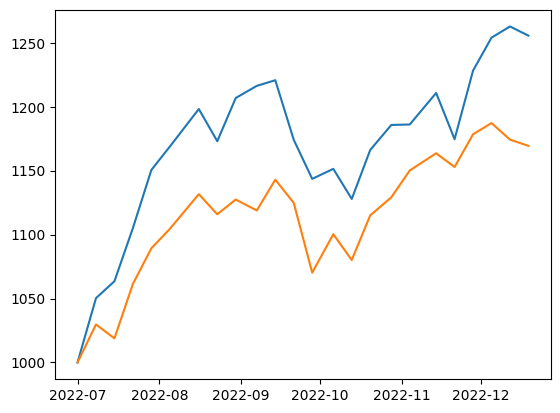

In [87]:
import matplotlib.pyplot as plt
plt.plot(pd.to_datetime(trading_dates[:-1]),wealth_combined)
plt.plot(pd.to_datetime(trading_dates[:-1]),nifty_wealth)
plt.plot(pd.to_datetime(trading_dates[:-1]),wealth_regime)
plt.xlabel("Date")
plt.ylabel("Cumulative returns")
plt.legend(['Combined Strategy wealth','Nifty 50 Index'])
plt.show()
